<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kwantyzacja-wektorowa" data-toc-modified-id="Kwantyzacja-wektorowa-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kwantyzacja wektorowa</a></span><ul class="toc-item"><li><span><a href="#Dane:-dwa-księżyce" data-toc-modified-id="Dane:-dwa-księżyce-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dane: dwa księżyce</a></span></li><li><span><a href="#Funkcja-odległości-Euklidesa" data-toc-modified-id="Funkcja-odległości-Euklidesa-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Funkcja odległości Euklidesa</a></span></li><li><span><a href="#Najbliższy-prototyp-do-wektora-x" data-toc-modified-id="Najbliższy-prototyp-do-wektora-x-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Najbliższy prototyp do wektora x</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie:-zaimplementuj-wektorową-kwantyzację" data-toc-modified-id="Ćwiczenie:-zaimplementuj-wektorową-kwantyzację-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ćwiczenie: zaimplementuj wektorową kwantyzację</a></span></li></ul></li><li><span><a href="#Szablon-klasy-VectorQuantization" data-toc-modified-id="Szablon-klasy-VectorQuantization-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Szablon klasy VectorQuantization</a></span></li><li><span><a href="#Test-inicjalizacji" data-toc-modified-id="Test-inicjalizacji-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Test inicjalizacji</a></span></li><li><span><a href="#Test-metody-find_nearest_protoytpe()" data-toc-modified-id="Test-metody-find_nearest_protoytpe()-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Test metody find_nearest_protoytpe()</a></span></li><li><span><a href="#Test-metody-fit()" data-toc-modified-id="Test-metody-fit()-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Test metody fit()</a></span></li><li><span><a href="#Predykcja" data-toc-modified-id="Predykcja-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Predykcja</a></span></li><li><span><a href="#Diagram-Voronoi" data-toc-modified-id="Diagram-Voronoi-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Diagram Voronoi</a></span></li></ul></li><li><span><a href="#Kompresja-obrazów" data-toc-modified-id="Kompresja-obrazów-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Kompresja obrazów</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Zamiana-obrazu-na-zbiór-uczący" data-toc-modified-id="Zamiana-obrazu-na-zbiór-uczący-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Zamiana obrazu na zbiór uczący</a></span></li></ul></li><li><span><a href="#Odtworzenie-obrazu-ze-zbioru-wektorów" data-toc-modified-id="Odtworzenie-obrazu-ze-zbioru-wektorów-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Odtworzenie obrazu ze zbioru wektorów</a></span></li><li><span><a href="#Błąd-rekonstrukcji-MSE" data-toc-modified-id="Błąd-rekonstrukcji-MSE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Błąd rekonstrukcji MSE</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie:-kompresja-obrazu" data-toc-modified-id="Ćwiczenie:-kompresja-obrazu-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Ćwiczenie: kompresja obrazu</a></span></li></ul></li><li><span><a href="#Zadanie-6:-Gaz-neuronowy" data-toc-modified-id="Zadanie-6:-Gaz-neuronowy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Zadanie 6: Gaz neuronowy</a></span></li></ul></li></ul></div>

# Kwantyzacja wektorowa

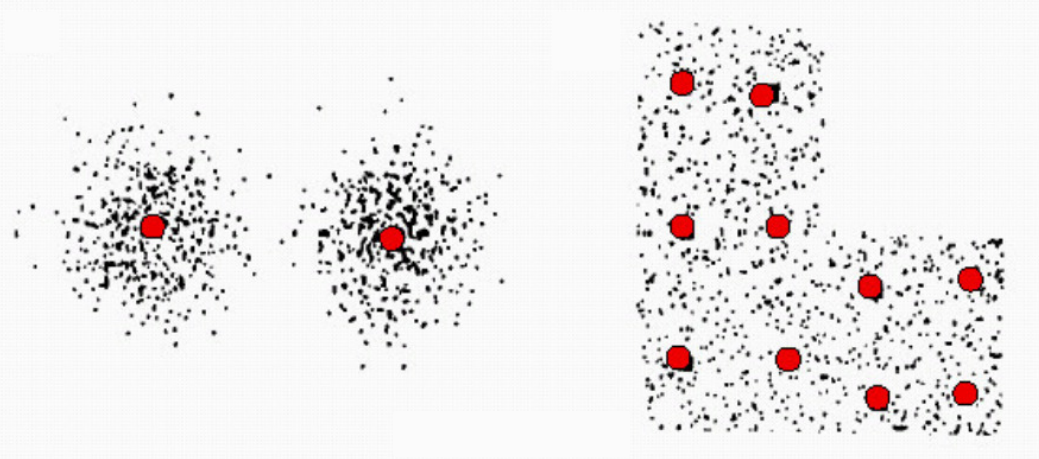

## Dane: dwa księżyce

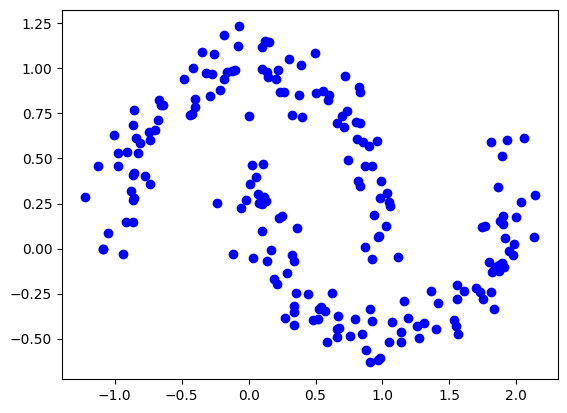

In [20]:
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt

n_samples = 200
data = datasets.make_moons(n_samples=n_samples, noise=0.1, random_state=42)

X, y = data[0], data[1]
plt.plot(X[:, 0], X[:, 1], 'ob')

## Funkcja odległości Euklidesa

$$ D(\mathbf{x}, \mathbf{y})^2 = \sum_i{(x_i - y_i)^2} $$

In [21]:
import numpy as np

def square_euclid(x, y):

    return np.sum((x - y)**2, axis=1)

x1 = np.array([[1.1, -2, 3], [1.1, -2, 3], [1.1, -2, 3]])
y1 = np.array([[4, 0, 6]])
print(square_euclid(x1, y1))

[21.41 21.41 21.41]


## Najbliższy prototyp do wektora x

In [22]:
n_prototypes = 5
n_features = 10

prototypes = np.random.randn(n_prototypes, n_features)
x = np.array(np.random.randn(1, n_features))

dists = square_euclid(prototypes, x)
print('Odległości: ', dists)
print('Zwycięzca: ', np.argmin(dists))

Odległości:  [13.65863185 13.24719818 15.23847294 10.1208536   9.62806799]
Zwycięzca:  4


### Ćwiczenie: zaimplementuj wektorową kwantyzację

**Algorytm uczenia**:  
Parametry: $\eta$ współczynnik uczenia,  $N$ ilość epok, $k$ ilość neuronow (prototypów)

1. Zainicjuj wagi $k$ neuronów (pozycje prototypów)  
2. Powtarzaj $N$ razy:
3. <ul>Dla każdego $\mathbf{x}$ ze zbioru treningowego wykonaj</ul>
4. <ul><ul>znajdź neuron zwycięzcę $\mathbf{w}_m$, gdzie $m=\arg \min _j\left\|\mathbf{w}_j-\mathbf{x}\right\|$
5. <ul><ul>przesuń wagi zwycięskiego neuronu w kierunku $\mathbf{x}$ <br>
    $\mathbf{w}_m = \mathbf{w}_m + \eta \left(\mathbf{x}-\mathbf{w}_m \right)$
   </ul></ul>
6. <ul>na koniec epoki oblicz i zachowaj wartość błedu kwantyzacji $E=\frac{1}{n} \sum_i\left\|\mathbf{x}_i-\mathbf{w}_{m(i)}\right\|$
    </ul>

## Szablon klasy VectorQuantization

Zaimplementuj algorytm kwantyzacji wektorowej korzystając z szablonu klasy ``VectorQuantization`` z pliku [vq.py](VectorQuantization.py)  

Parametry konstruktora: 
  * ``n_prototypes`` liczba prototypów kodujących
  * ``eta`` współczynnik uczenia
  * ``n_epochs`` liczba epok uczenia
  
**Zaimplementuj brakujące metody:**
  * ``init_prototypes(X)`` ustala ``n_hidden`` losowych prototypów w macierzy ``prototypes``
  * ``find_nearest_prototype(x)`` zwraca indeks zwycięskiego prototypu (najbliższego do ``x``)
  * ``fit(X)`` algorytm uczenia
  * ``predict(X)`` zwraca numery zwycięskich prototypów dla każdego wektora ze zbioru ``X``
  * ``score(X)`` zwraca średnią odległość wektorów ``X`` od zwycięskich prototypów (błąd kwantyzacji)

In [23]:
from sklearn.base import BaseEstimator

class VectorQuantization(BaseEstimator):

    def __init__(self, n_prototypes=10, eta=0.1, n_epochs=10):
        self.n_prototypes = n_prototypes
        self.eta = eta
        self.n_epochs = n_epochs

    def init_prototypes(self, X):

        return self

    def find_nearest_prototype(self, x):
        
        return

    def fit(self, X):
        
        return self

    def predict(self, X):
        
        return 

    def score(self, X):
        
        return 

In [24]:
# Rozwiązanie: 
from vq import VectorQuantization

class VQ1(VectorQuantization):
    
    def init_prototypes(self, X):
        self.prototypes = np.random.permutation(X)[:self.n_prototypes].copy()
        return self
 
    def find_nearest_prototype(self, x):        
        dist = square_euclid(x, self.prototypes)       
        return np.argmin(dist)

    def fit(self, X):
        
        self.init_prototypes(X)
        self.errors = [ self.score(X) ]
        
        for _ in range(self.n_epochs):
            
            for x in np.random.permutation(X):
                m = self.find_nearest_prototype(x)
                self.prototypes[m] += self.eta * ( x - self.prototypes[m])
            self.errors.append(self.score(X))
        return self

    def predict(self, X):
        
        return np.array([self.find_nearest_prototype(x) for x in X], dtype=np.int32)

    def score(self, X):
        
        error = []
        for x in X:
            dist = square_euclid(x, self.prototypes)
            m = np.argmin(dist)
            error.append(dist[m])
        return np.mean(error)

## Test inicjalizacji


[[0.8298449  0.34720807]
 [0.20233423 0.94002688]
 [0.05567716 0.39725927]]
Score:  0.5599969014127545


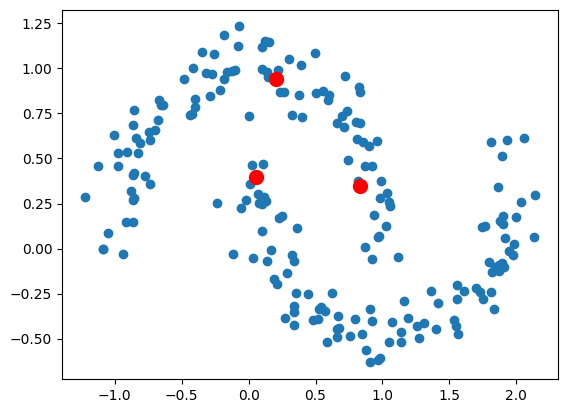

In [25]:
vq = VQ1(n_prototypes=3)
vq.init_prototypes(X)

print(vq.prototypes)
print('Score: ', vq.score(X))

plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(vq.prototypes[:, 0], vq.prototypes[:, 1], 'or', markersize=10)

## Test metody find_nearest_protoytpe()

3


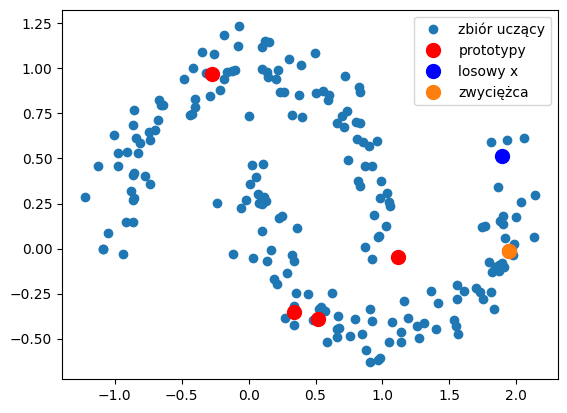

In [26]:
vq = VQ1(n_prototypes=5)
vq.init_prototypes(X)
# print(vq.prototypes)

x_rand = np.random.randint(X.shape[0])

bmu = vq.find_nearest_prototype(X[x_rand])
print(bmu)

plt.plot(X[:, 0], X[:, 1], 'o', label='zbiór uczący')
plt.plot(vq.prototypes[:, 0], vq.prototypes[:, 1], 'or', markersize=10, label='prototypy')
plt.plot(X[x_rand, 0], X[x_rand, 1], 'ob', markersize=10, label='losowy x')
plt.plot(vq.prototypes[bmu, 0], vq.prototypes[bmu, 1], 'o', markersize=10, label='zwyciężca')
plt.legend()

## Test metody fit()

**Ćwiczenie**: przetestuj zbieżność dla różych wartości ``eta=0.001, 0.01, 0.1, 1.0, 10`` oraz róznej liczby prototypów ``n_prototypes=2, 5, .. ``

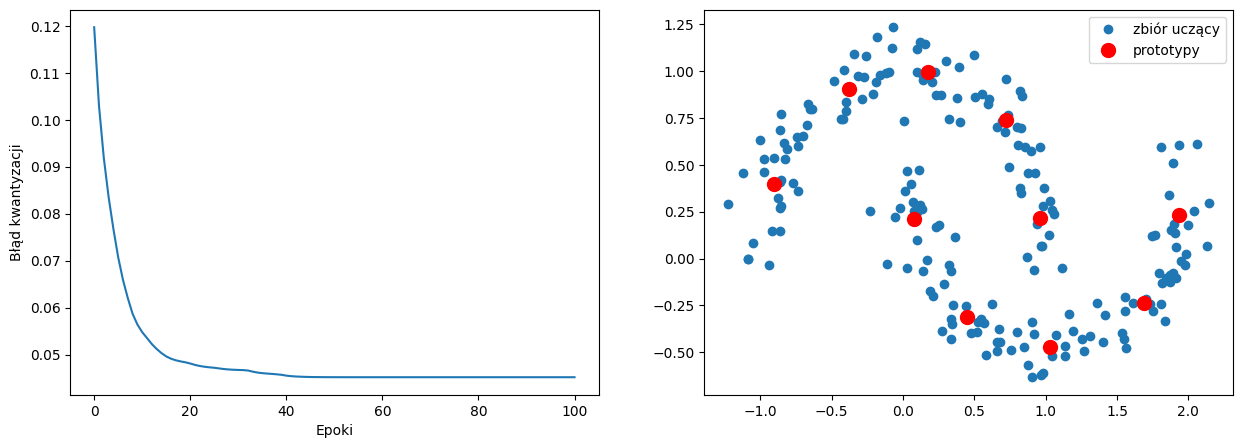

In [27]:
vq = VQ1(n_prototypes=10, n_epochs=100, eta=0.01)
vq.fit(X)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(range(len(vq.errors)), vq.errors)
ax1.set_xlabel('Epoki')
ax1.set_ylabel('Błąd kwantyzacji')

ax2.plot(X[:, 0], X[:, 1], 'o', label='zbiór uczący')
ax2.plot(vq.prototypes[:, 0], vq.prototypes[:, 1], 'or', markersize=10, label='prototypy')
plt.legend()

## Predykcja

Prediction: [1 0 0 4 4 0 1 3 3 2 2 3 3 1 3 3 2 4 1 2 4 0 4 1 2 2 1 2 4 4 0 0 2 1 4 0 4
 4 3 1 1 3 0 0 4 3 0 0 4 1 0 3 4 4 0 1 4 1 3 1 3 1 0 0 0 0 2 3 1 4 2 4 3 2
 0 0 0 4 2 0 4 1 2 3 3 1 4 0 3 2 0 4 0 0 0 3 4 0 0 0 4 0 4 4 0 4 0 2 0 4 3
 4 3 4 1 4 2 2 4 0 2 0 3 4 0 0 3 4 1 2 3 2 1 4 2 4 4 1 2 4 3 3 3 2 1 2 0 0
 1 1 3 3 1 0 0 2 3 4 0 1 3 4 3 3 2 2 0 2 3 2 2 1 0 2 3 3 4 2 4 3 4 2 4 4 4
 0 1 0 1 1 4 3 0 3 1 0 0 1 3 0]


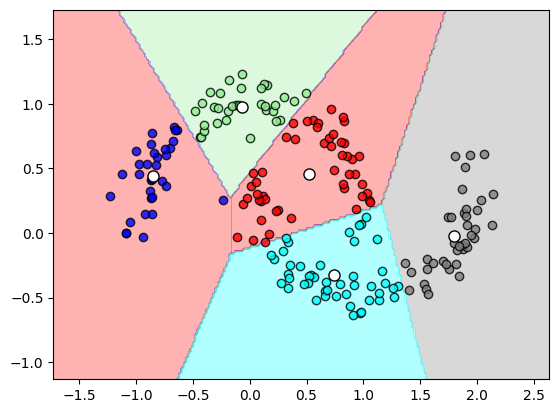

In [28]:
from utils import plot_decision_regions

vq = VQ1(n_epochs=100, eta=0.01, n_prototypes=5)
vq.fit(X)

pred = vq.predict(X)
print('Prediction:', pred)

plot_decision_regions(X, pred, vq)
plt.plot(vq.prototypes[:, 0], vq.prototypes[:, 1], 'ok', mfc='w', markersize=8)
plt.show()

## Diagram Voronoi

Klasa [scipy.spatial.Voronoi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html)

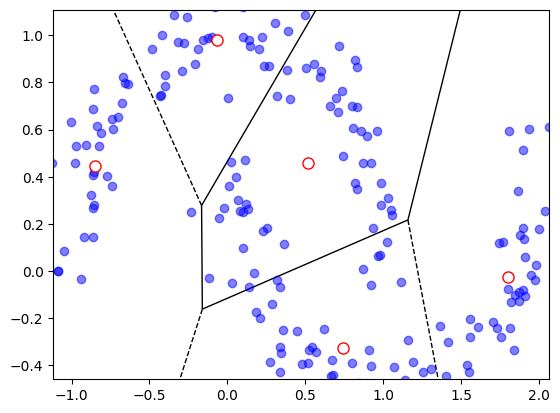

In [29]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(vq.prototypes)
fig = voronoi_plot_2d(vor, show_vertices=False)
plt.plot(X[:,0], X[:, 1], 'ob', alpha=0.5)
plt.plot(vq.prototypes[:, 0], vq.prototypes[:, 1], 'or', mfc='w', markersize=8)
plt.show()

# Kompresja obrazów

Wymiar obrazu: (768, 1024, 3)


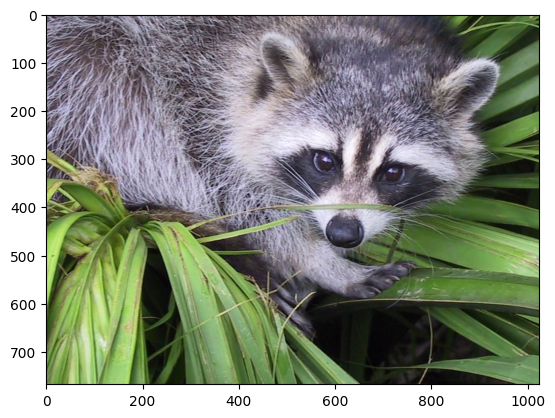

In [30]:
from scipy.datasets import face

img = face()

print('Wymiar obrazu:', img.shape)
plt.imshow(img)

### Zamiana obrazu na zbiór uczący

Funkcja ``img_to_vectors`` zamienia obraz RGB (kształt ``[width, height, 3]``) na zbiór uczący poprzez podział obrazu na fragmenty o wielkość określonej przez ``patch_size=(N, M)``.

In [31]:
def img_to_vectors(img, patch_size=(3, 3)):

    img_b = np.pad(img, ((0, patch_size[0]), (0, patch_size[1]), (0,0)), mode='edge')
    
    vectors = []
    for y in range(0, img.shape[0], patch_size[0]):
        for x in range(0, img.shape[1], patch_size[1]):
            patch = img_b[y:y + patch_size[0], x:x + patch_size[1]]
            vectors.append(patch.ravel())
    return np.array(vectors)

In [32]:
X = img_to_vectors(img, patch_size=(10, 10))
print('Zbior danych: ', X.shape)

Zbior danych:  (7931, 300)


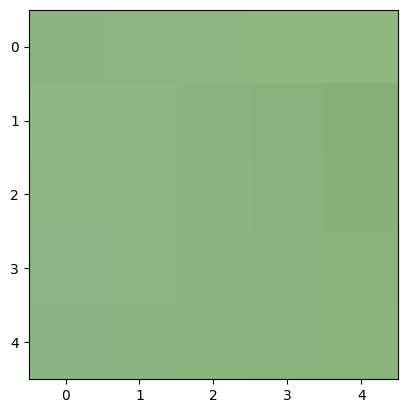

In [33]:
patch_size = (5, 5)
X = img_to_vectors(img, patch_size=patch_size)
i = np.random.randint(X.shape[0])
plt.imshow(X[i].reshape([patch_size[0], patch_size[1], 3]))

## Odtworzenie obrazu ze zbioru wektorów 

Funkcja odtwarza obraz o wymiarze docelowym ``img_shape=(height, width, channels)`` z podanych wektorów ``vectors`` uzyskanychty przez podział na łaty o wielkości ``patch_size=(N, M)``

In [34]:
def vectors_to_image(vectors, img_shape, patch_size):

    img_height, img_width = img_shape[0], img_shape[1]
    restored = np.zeros((img_height + patch_size[0], img_width + patch_size[1], img_shape[2]), dtype=np.int32)

    i=0
    for y in range(0, img_height, patch_size[0]):
        for x in range(0, img_width, patch_size[1]):
            restored[y:y+patch_size[0], x:x+patch_size[1], :] = vectors[i].reshape((patch_size[0], patch_size[1], img_shape[2]))
            i = i + 1

    return restored[:img_height, :img_width]

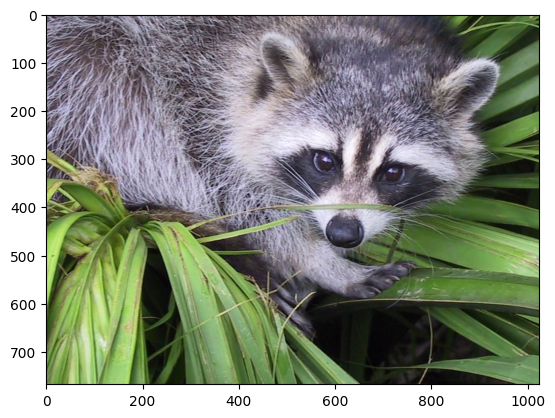

In [35]:
restored_img = vectors_to_image(X, img.shape, patch_size=patch_size)
plt.imshow(restored_img)

## Błąd rekonstrukcji MSE

In [36]:
def mse(img1, img2):
    
    return np.sum(square_euclid(img1, img2))/img1.size

print('MSE odtworzenia ', mse(img, restored_img))

MSE odtworzenia  0.0


### Ćwiczenie: kompresja obrazu

Wykorzystaj algorytm kwantyzacji wektorowej do kompresji obrazu ``scipy.misc.face``.  
Porównaj błąd rekonstrukcji (MSE) dla obrazów uzyskanych dla różnych rozmiarów księgi kodów (np. 2, 5, 10, ...) oraz róznych wielkości łatek, np. ``(3, 3)``, ``(5, 5)`` 

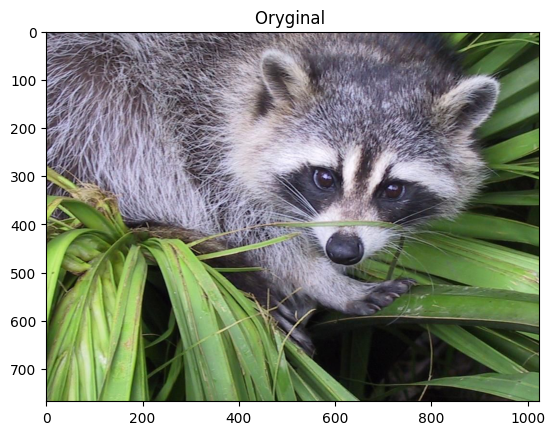

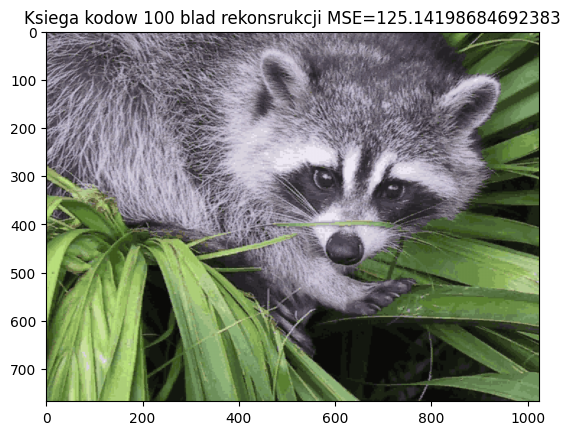

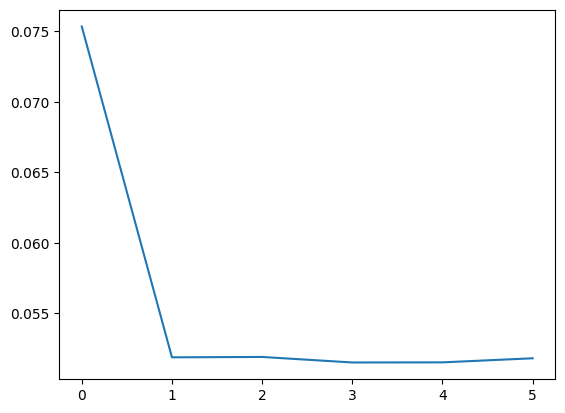

In [37]:
# Rozwiązanie

patch_size=(3, 3)
n_prototypes = 100

X = img_to_vectors(img, patch_size)
X = X /255
vq = VQ1(n_epochs=5, n_prototypes=n_prototypes, eta=0.1)
vq.fit(X)
pred = vq.predict(X)

plt.imshow(img)
plt.title(f'Oryginal ')
plt.show()


restored_img = vectors_to_image(vq.prototypes[pred] * 255, img_shape=img.shape, patch_size=patch_size)
plt.imshow(restored_img)
plt.title(f'Ksiega kodow {n_prototypes} blad rekonsrukcji MSE={mse(img, restored_img)}')
plt.show()

plt.plot(range(len(vq.errors)), vq.errors )
plt.show()

## Zadanie 6: Gaz neuronowy

Zaimplementuj algorytm gazu neuronowego służącego do kwantyzacji wektorowej. W implementacji możesz wykorzystać klasę ``VectorQuantization`` z pliku [vq.py](vq.py) i oraz implementację kwantyzacji wektorowej z ćwiczeń, wówczas rozwiązanie sprowadza się do przeciążenia metody ``fit()``. 

**Parametry początkowe** (ustawiane w argumentach konstruktora):

* $N$ liczba epok
* $k$ liczba neuronów (prototypów)
* $\eta_0$ początkowa wartość kroku uczenia
* $\lambda_0$ początkowa wartość promienia sąsiedztwa
* $\eta_{min}$ końcowa wartość kroku uczenia
* $\lambda_{min}$ końcowa wartość promienia sąsiedztwa

**Algorytm gazu neuronowego**  

1. Zainicjuj wagi $\mathbf{w}_i$ neuronów  (pozycje prototypów)
2. Ustaw $t=0$ oraz $T$ równe całkowitej liczbie iteracji (iloczyn liczby epok $N$ i liczby przypadków uczących)
3. Powtarzaj $N$ razy:
4. <ul>Dla każdego przypadku $\mathbf{x}$ ze zbioru uczącego wykonaj</ul>
5. <ul><ul>wyznacz aktualny współczynnik uczenia <br> $\eta(t)=\eta_0\left(\frac{\eta_{\min }}{\eta_0}\right)^{\frac{t}{T}}$
    </ul></ul>
6. <ul><ul>wyznacz aktualny promień sąsiedztwa <br> $\lambda(t)=\lambda_0\left(\frac{\lambda_{\min }}{\lambda_0}\right)^{\frac{t}{T}}$
    </ul></ul>
7. <ul><ul>uporządkuj neurony względem odległości od $\mathbf{x}$ (<i> wskazówka: kolejność prototypów można uzyskać funkcją <a href="https://numpy.org/doc/stable/reference/generated/numpy.argsort.html">numpy.argsort</a> </i>)</ul></ul>  
8. <ul><ul>zaktualizuj wagi <br> 
   $\mathbf{w}_{i} \leftarrow \mathbf{w}_{i} + \eta(t) \cdot h_i(t) \cdot \left(\mathbf{x}-\mathbf{w}_i\right)\,$<br> gdzie $\, h_i(t)=e^{-\frac{m(i)}{\lambda(t)}}$, zaś 
   $\, m(i) = 0, 1, \ldots, k-1$ oznacza pozycję neuronu $\mathbf{w}_i$ w rankingu odległości od najbliższego do najdalszego
    </ul></ul>
1. <ul><ul>zwiększ $t = t + 1$</ul></ul>

Wykorzystaj algorytm gazu neuronowego do kompresji obrazu [dane/Lenna.png](dane/Lenna.png). Do przygotowania zbioru uczącego możesz wykorzystać funkcje ``img_to_vectors`` oraz ``vectors_to_image`` dostępne w pliku [utils.py](utils.py)  
Spróbuj dobrać parametry modelu gazu neuronowego tak aby uzyskać jak najmniejszy błąd rekonstrukcji przy jak najmniejszym rozmiarze księgi kodów (liczby prototypów). 

(512, 512, 3)
float32


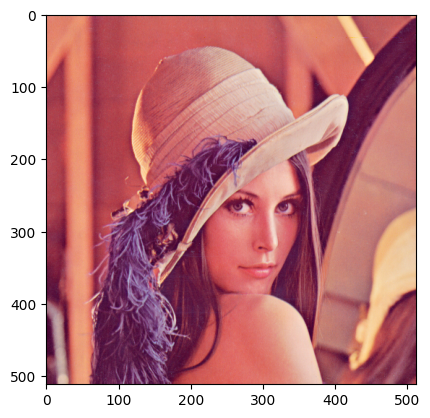

In [38]:
import matplotlib.pyplot as plt

image = plt.imread('dane/Lenna.png')
print(image.shape)
print(image.dtype)
plt.imshow(image)